# sharing_bike_prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dpth = r"C:\seoul bike sharing demand prediction\data\SeoulBikeData.csv"

In [3]:
df = pd.read_csv(dpth, encoding="unicode_escape")

In [4]:
df.shape

(8760, 14)

In [5]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
df.describe(include="all").T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

In [8]:
#convertin to datetime
df["Date"] = pd.to_datetime(df['Date'], format="%d/%m/%Y")


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [10]:
# Extract day, month, and year into new columns
df['date'] = df['Date'].dt.day
df['day'] = df['Date'].dt.day_name()
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Get the index of the 'Date' column
date_index = df.columns.get_loc('Date')

# Create a list of columns in the desired order
cols = df.columns.tolist()
for col in ['day', 'month', 'year', 'date']:
    if col in cols:
        cols.remove(col)

cols.insert(date_index + 1, 'day')
cols.insert(date_index + 2, 'date')
cols.insert(date_index + 3, 'month')
cols.insert(date_index + 4, 'year')
# Reorder DataFrame columns
df = df[cols]



In [11]:
df.head()

Date     day  date  month  year  Rented Bike Count  Hour  \
0 2017-12-01  Friday     1     12  2017                254     0   
1 2017-12-01  Friday     1     12  2017                204     1   
2 2017-12-01  Friday     1     12  2017                173     2   
3 2017-12-01  Friday     1     12  2017                107     3   
4 2017-12-01  Friday     1     12  2017                 78     4   

   Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0             -5.2           37               2.2              2000   
1             -5.5           38               0.8              2000   
2             -6.0           39               1.0              2000   
3             -6.2           40               0.9              2000   
4             -6.0           36               2.3              2000   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                      -17.6                      0.0           0.0   
1                      -17.6                      0.0           0.0   
2                      -17.7                      0.0           0.0   
3                      -17.6                      0.0           0.0   
4                      -18.6                      0.0           0.0   

   Snowfall (cm) Seasons     Holiday Functioning Day  
0            0.0  Winter  No Holiday             Yes  
1            0.0  Winter  No Holiday             Yes  
2            0.0  Winter  No Holiday             Yes  
3            0.0  Winter  No Holiday             Yes  
4            0.0  Winter  No Holiday             Yes

In [12]:
df = df.drop(columns=['Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   day                        8760 non-null   object 
 1   date                       8760 non-null   int32  
 2   month                      8760 non-null   int32  
 3   year                       8760 non-null   int32  
 4   Rented Bike Count          8760 non-null   int64  
 5   Hour                       8760 non-null   int64  
 6   Temperature(°C)            8760 non-null   float64
 7   Humidity(%)                8760 non-null   int64  
 8   Wind speed (m/s)           8760 non-null   float64
 9   Visibility (10m)           8760 non-null   int64  
 10  Dew point temperature(°C)  8760 non-null   float64
 11  Solar Radiation (MJ/m2)    8760 non-null   float64
 12  Rainfall(mm)               8760 non-null   float64
 13  Snowfall (cm)              8760 non-null   float

# EDA

In [14]:
def univariate_eda(df):
    # Numerical columns
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    n_num_cols = len(num_cols)
    
    if n_num_cols > 0:
        plt.figure(figsize=(15, 4 * (n_num_cols // 3 + 1)))
        for i, col in enumerate(num_cols, 1):
            plt.subplot((n_num_cols + 2) // 3, 3, i)
            sns.histplot(df[col], kde=True, bins=30)
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()
    
    # Categorical columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    n_cat_cols = len(cat_cols)
    
    if n_cat_cols > 0:
        plt.figure(figsize=(15, 4 * (n_cat_cols // 3 + 1)))
        for i, col in enumerate(cat_cols, 1):
            plt.subplot((n_cat_cols + 2) // 3, 3, i)
            sns.countplot(data=df, x=col)
            plt.title(f'Count of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

    # Summary statistics
    print("Summary Statistics for Numerical Columns:")
    print(df[num_cols].describe(), "\n")
    
    print("Value Counts for Categorical Columns:")
    for col in cat_cols:
        print(f'\n{col} Value Counts:')
        print(df[col].value_counts())


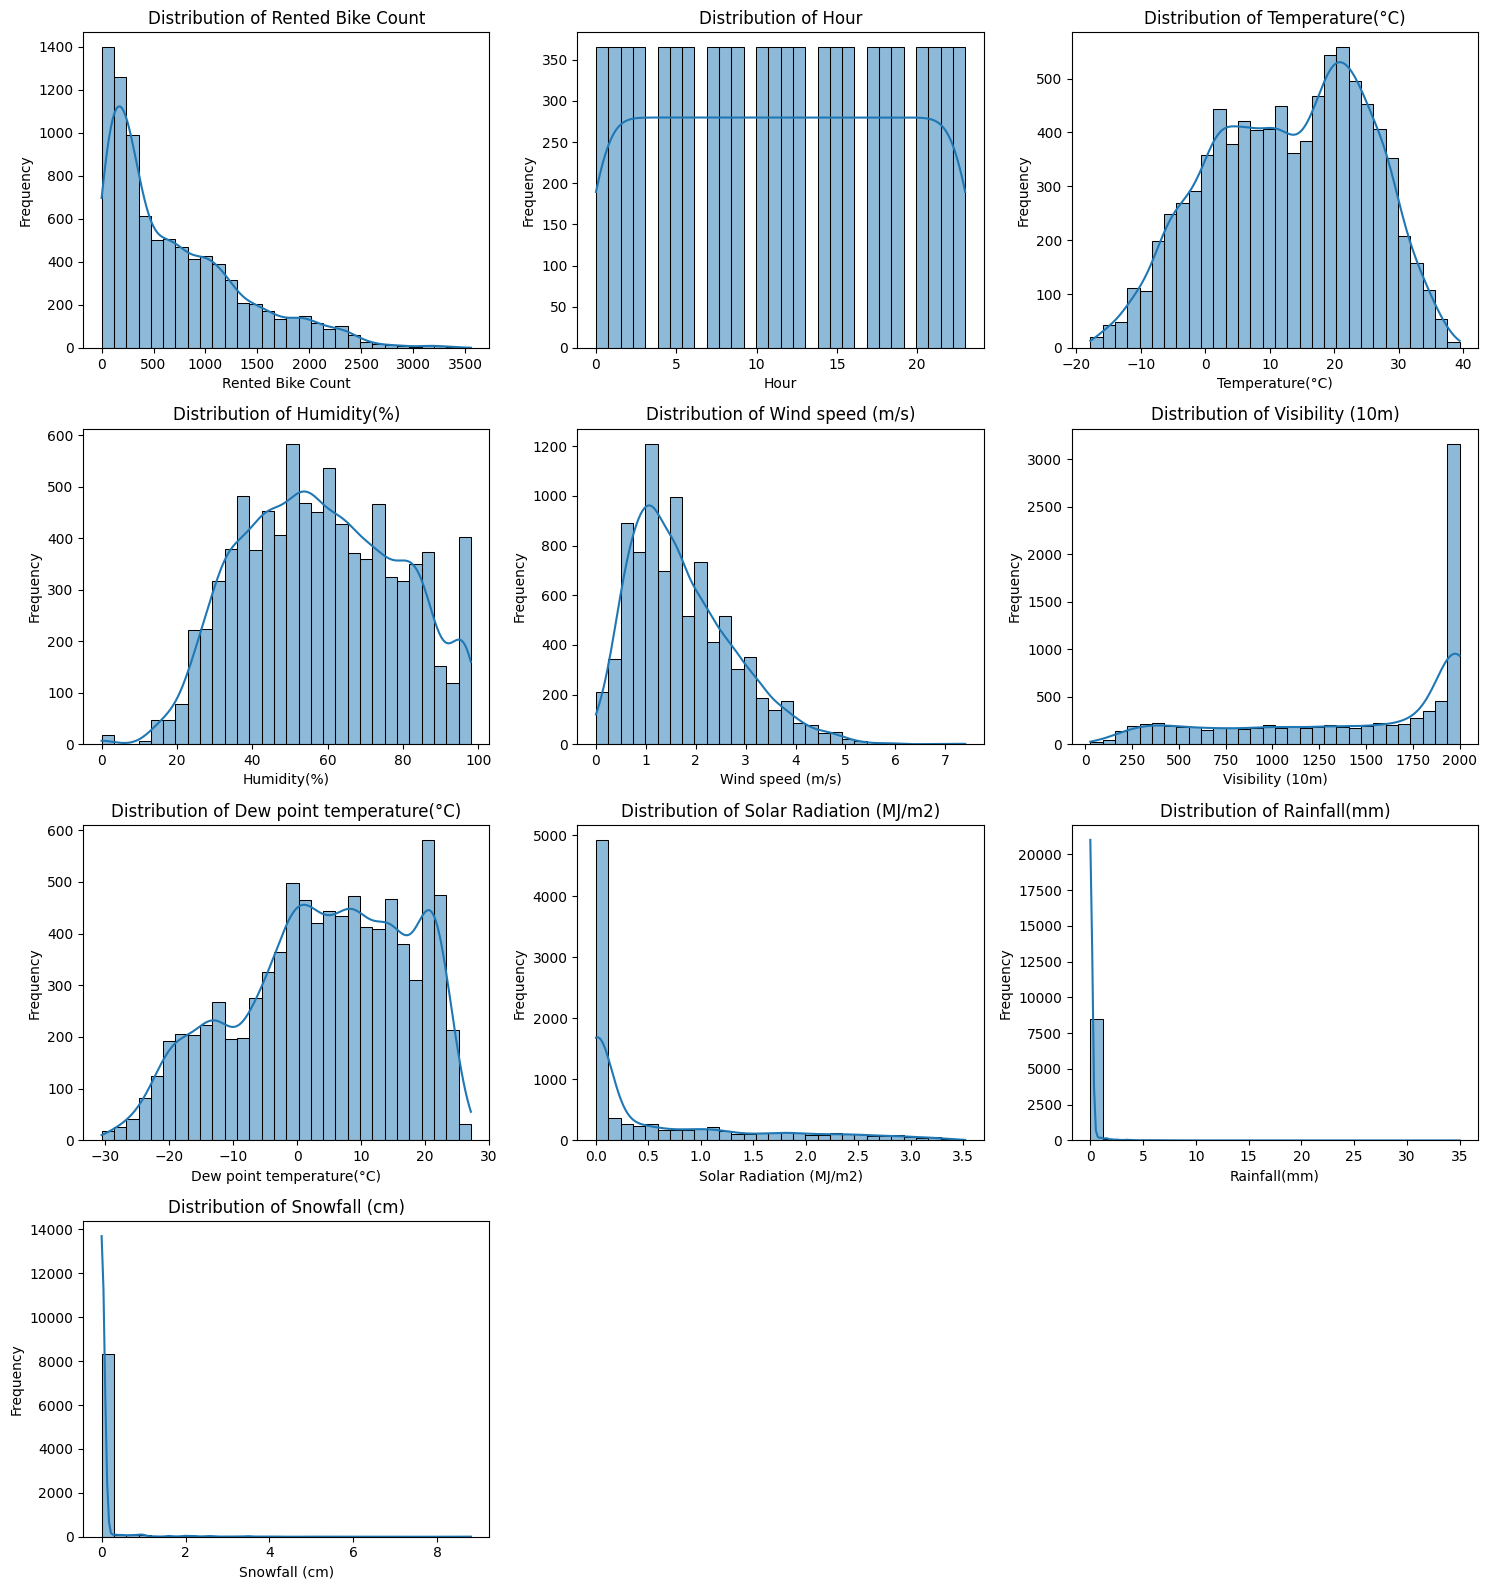

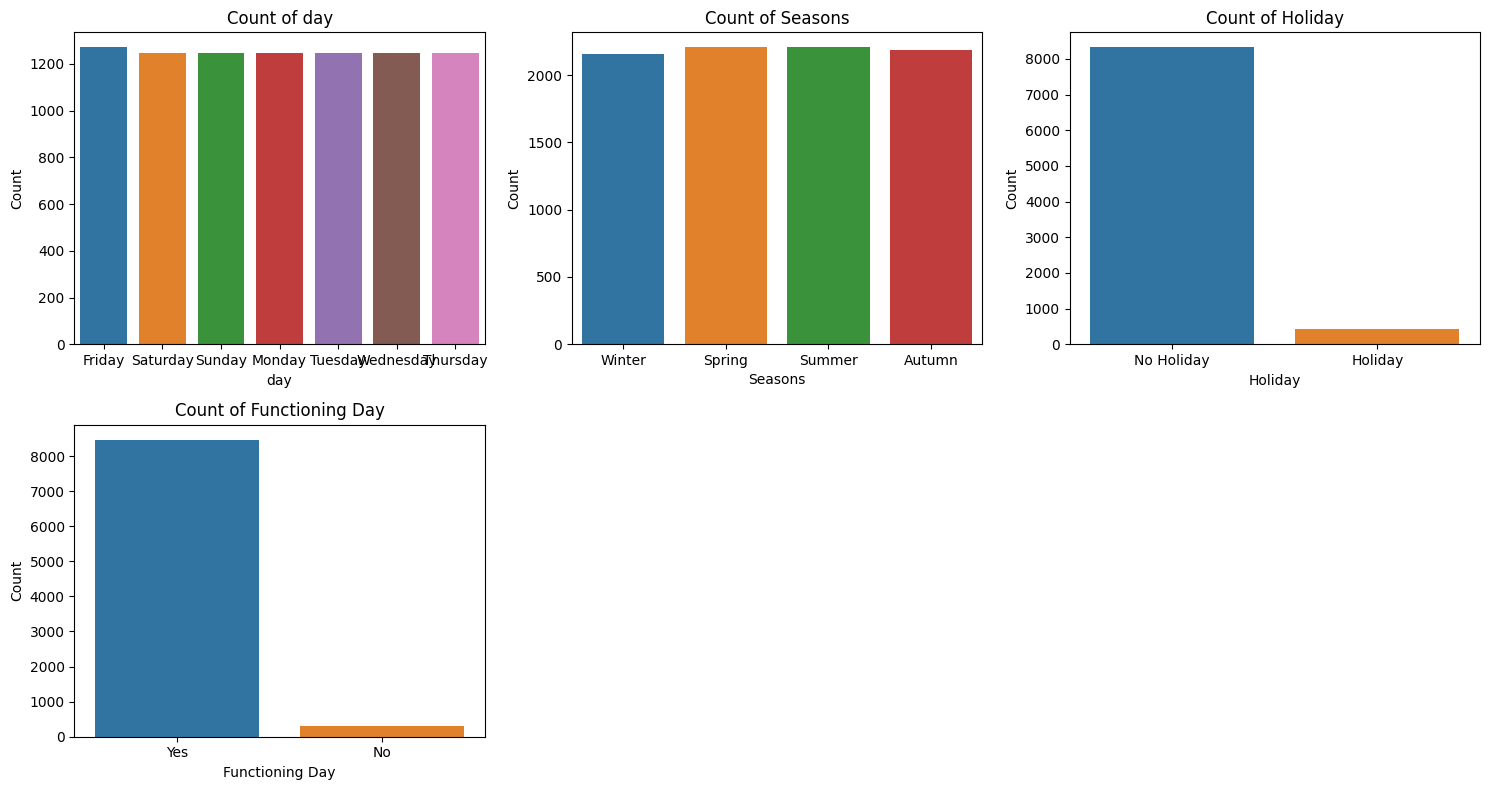

Summary Statistics for Numerical Columns:
       Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000       

In [15]:
univariate_eda(df)

count    8760.000000
mean     2017.915068
std         0.278796
min      2017.000000
25%      2018.000000
50%      2018.000000
75%      2018.000000
max      2018.000000
Name: year, dtype: float64


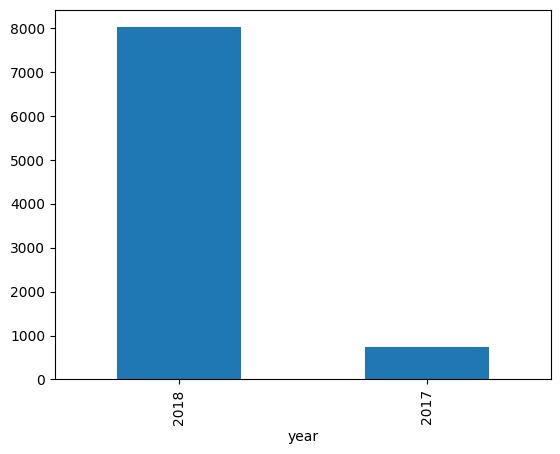

In [16]:
df['year'].value_counts().plot(kind='bar')
print(df['year'].describe())

count    8760.000000
mean        6.526027
std         3.448048
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: month, dtype: float64


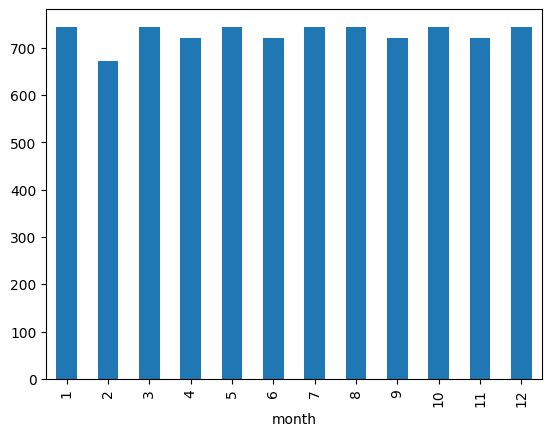

In [17]:
df['month'].value_counts().sort_index().plot(kind='bar')
print(df['month'].describe())

count    8760.000000
mean       15.720548
std         8.796749
min         1.000000
25%         8.000000
50%        16.000000
75%        23.000000
max        31.000000
Name: date, dtype: float64


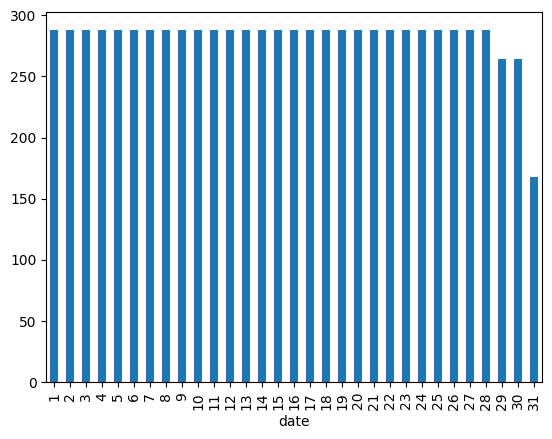

In [18]:
df['date'].value_counts().sort_index().plot(kind='bar')
print(df['date'].describe())

-Many of the variables, including Rented Bike Count, Wind Speed, Visibility, Solar Radiation, Rainfall, and Snowfall, have right-skewed distributions, indicating that their values are more frequently low.
-Temperature, Humidity, and Dew Point Temperature exhibit more bell-shaped (normal-like) distributions, indicating a more even spread around a central value.
-The Hour,day,month variable is mostly uniform.
-According to data 2018 has more rented bike count.

# bivariate analysis

In [19]:

def bivariate_analysis(df, target_col):
    # Numerical columns
    num_cols = df.select_dtypes(include=['float64', 'int64','int32']).columns
    num_cols = [col for col in num_cols if col != target_col]
    
    for col in num_cols:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[col], y=df[target_col])
        plt.title(f'{target_col} vs. {col}')
        plt.xlabel(col)
        plt.ylabel(target_col)
        plt.show()
        
        # Calculate and display correlation coefficient
        correlation = df[col].corr(df[target_col])
        print(f'Correlation between {col} and {target_col}: {correlation:.2f}')
        print('\n')

    # Categorical columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    
    for col in cat_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col], y=df[target_col])
        plt.title(f'{target_col} by {col}')
        plt.xlabel(col)
        plt.ylabel(target_col)
        plt.show()
        
        # Display group mean or median
        print(f'Mean {target_col} by {col}:')
        print(df.groupby(col)[target_col].mean())
        print('\n')

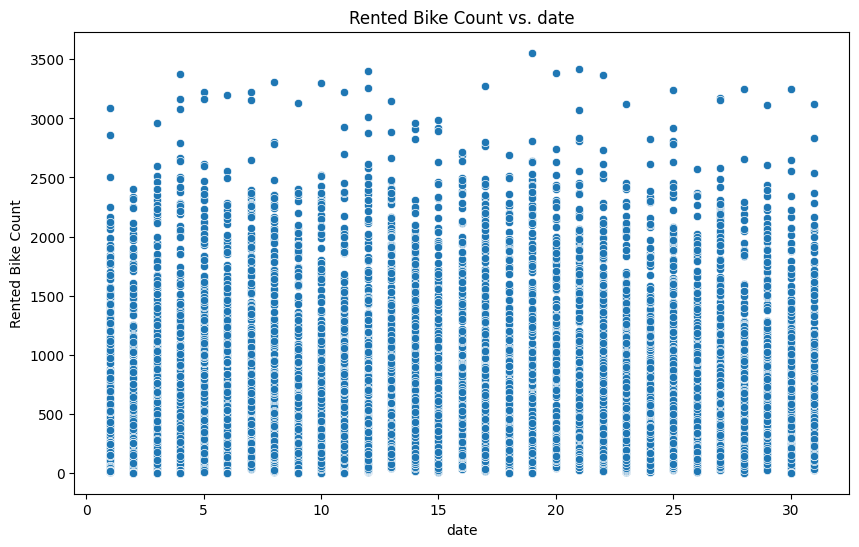

Correlation between date and Rented Bike Count: 0.02




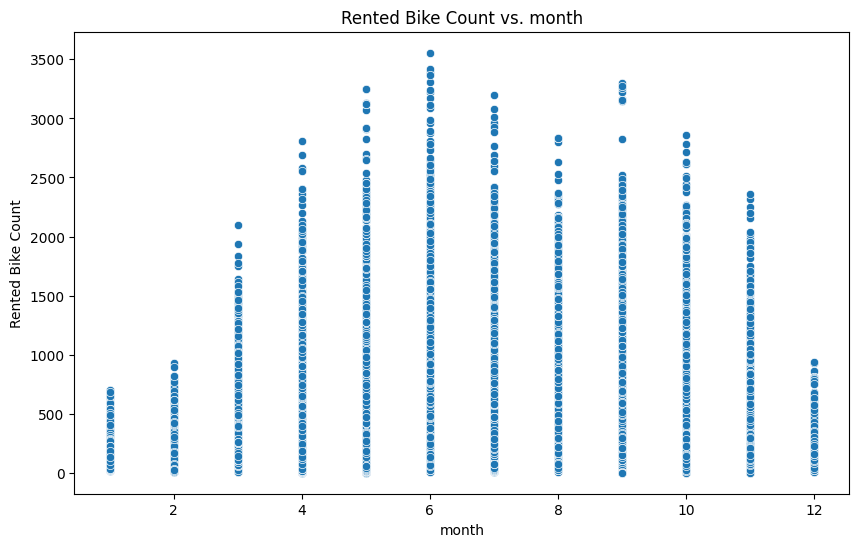

Correlation between month and Rented Bike Count: 0.13




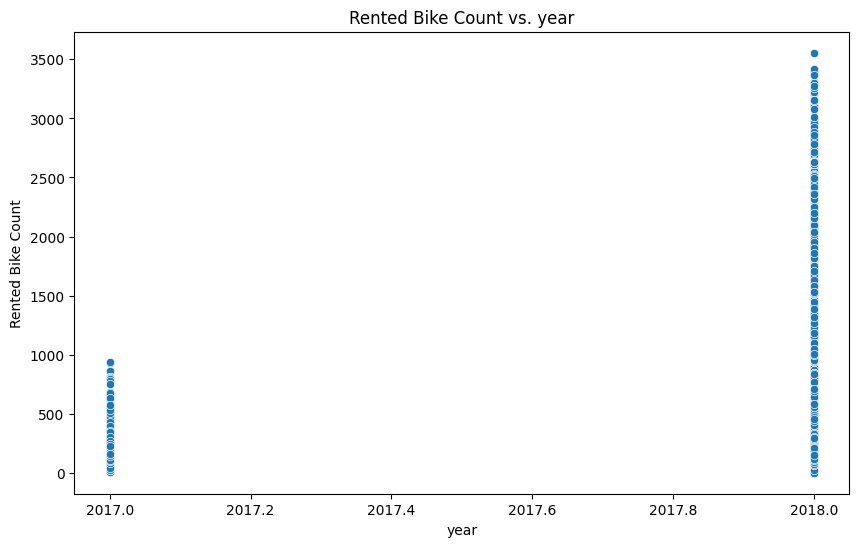

Correlation between year and Rented Bike Count: 0.22




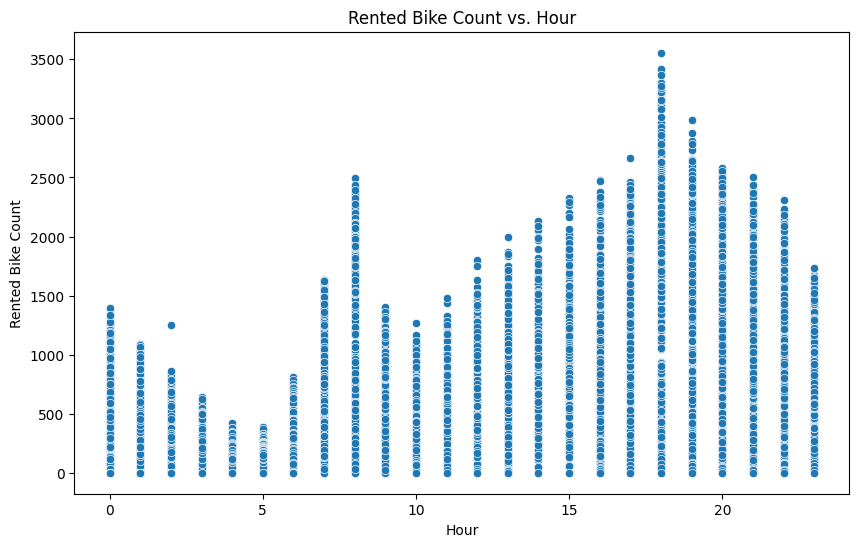

Correlation between Hour and Rented Bike Count: 0.41




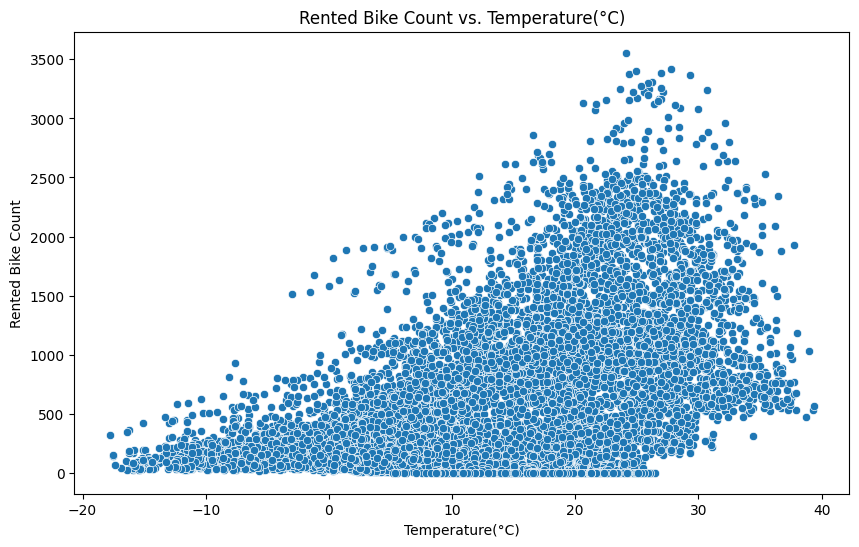

Correlation between Temperature(°C) and Rented Bike Count: 0.54




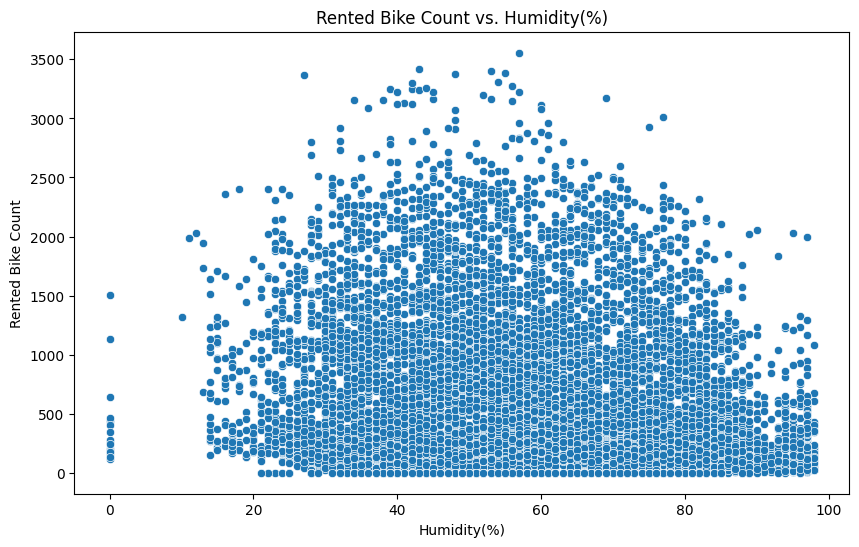

Correlation between Humidity(%) and Rented Bike Count: -0.20




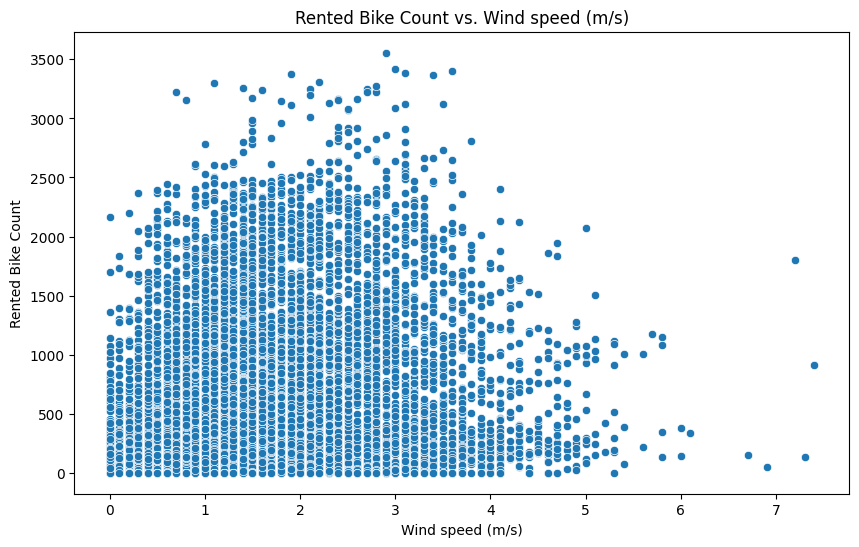

Correlation between Wind speed (m/s) and Rented Bike Count: 0.12




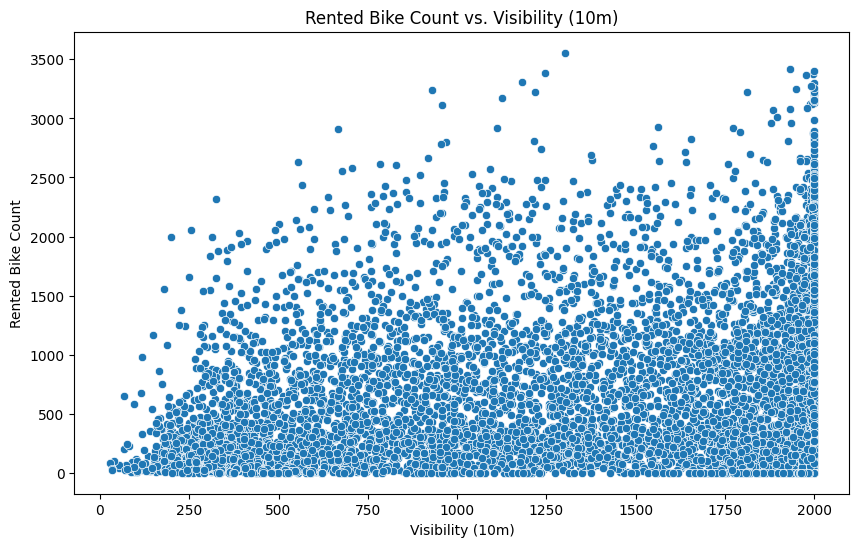

Correlation between Visibility (10m) and Rented Bike Count: 0.20




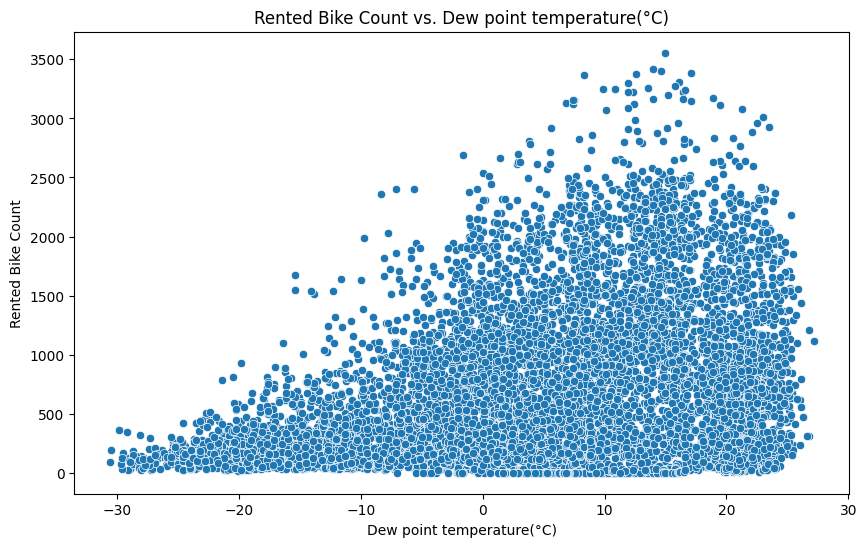

Correlation between Dew point temperature(°C) and Rented Bike Count: 0.38




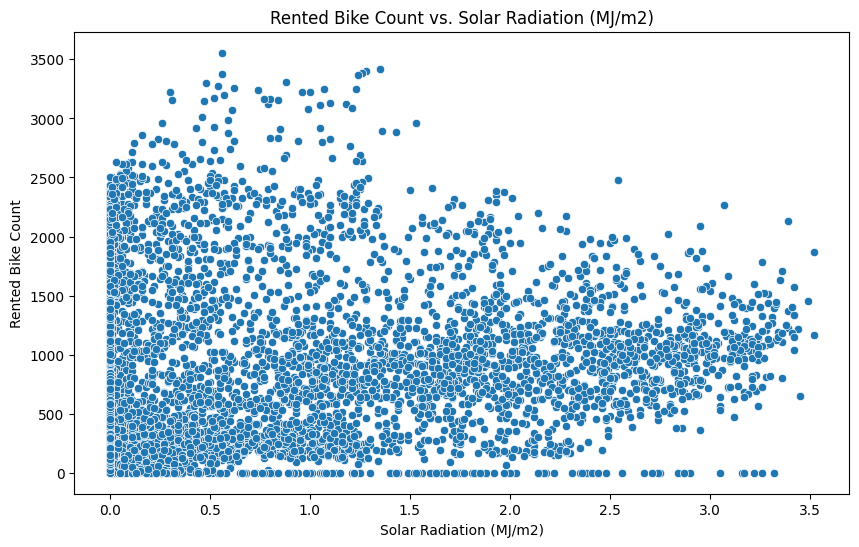

Correlation between Solar Radiation (MJ/m2) and Rented Bike Count: 0.26




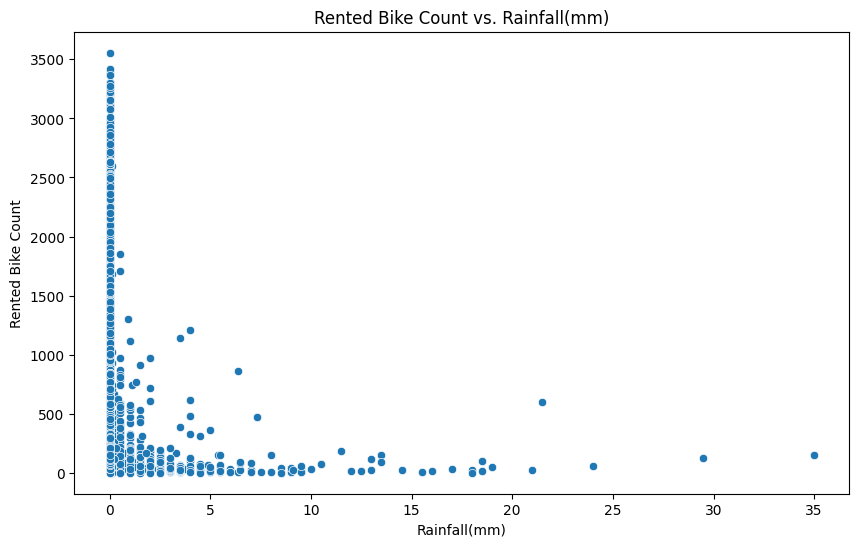

Correlation between Rainfall(mm) and Rented Bike Count: -0.12




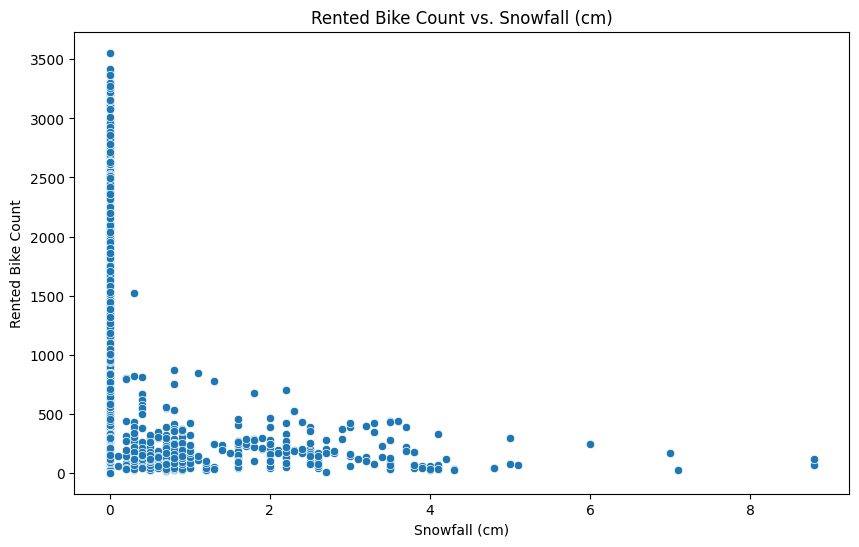

Correlation between Snowfall (cm) and Rented Bike Count: -0.14




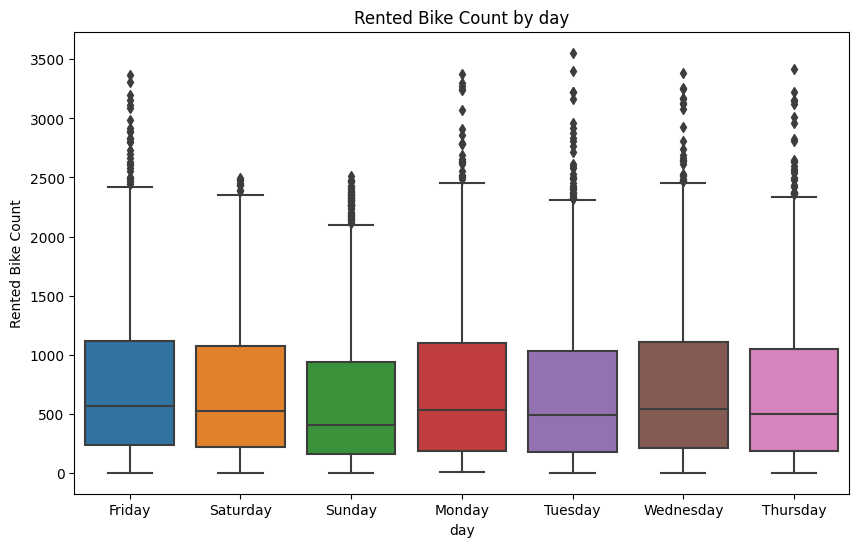

Mean Rented Bike Count by day:
day
Friday       747.117925
Monday       730.563301
Saturday     709.528846
Sunday       625.155449
Thursday     690.704327
Tuesday      687.977564
Wednesday    740.349359
Name: Rented Bike Count, dtype: float64




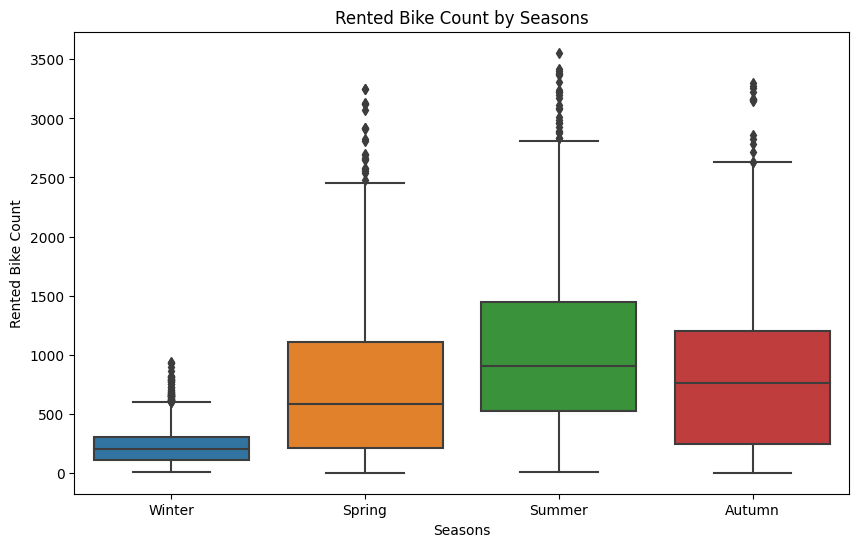

Mean Rented Bike Count by Seasons:
Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64




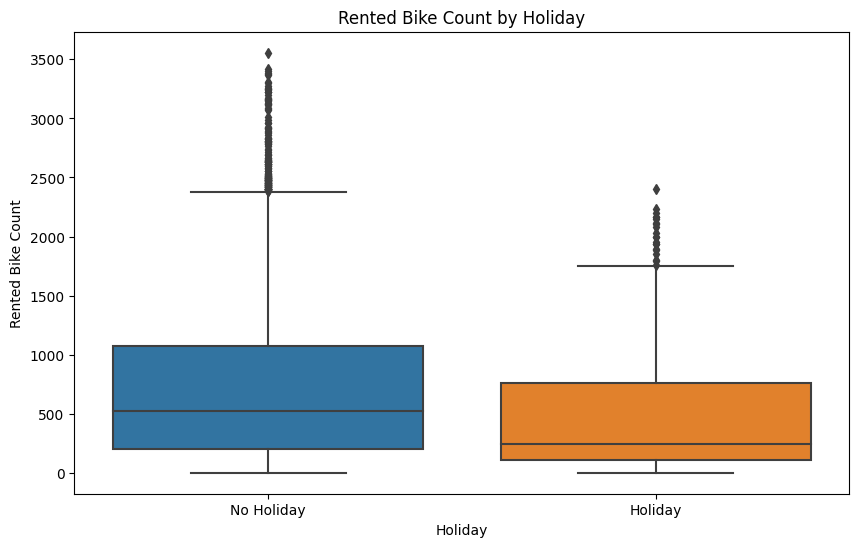

Mean Rented Bike Count by Holiday:
Holiday
Holiday       499.756944
No Holiday    715.228026
Name: Rented Bike Count, dtype: float64




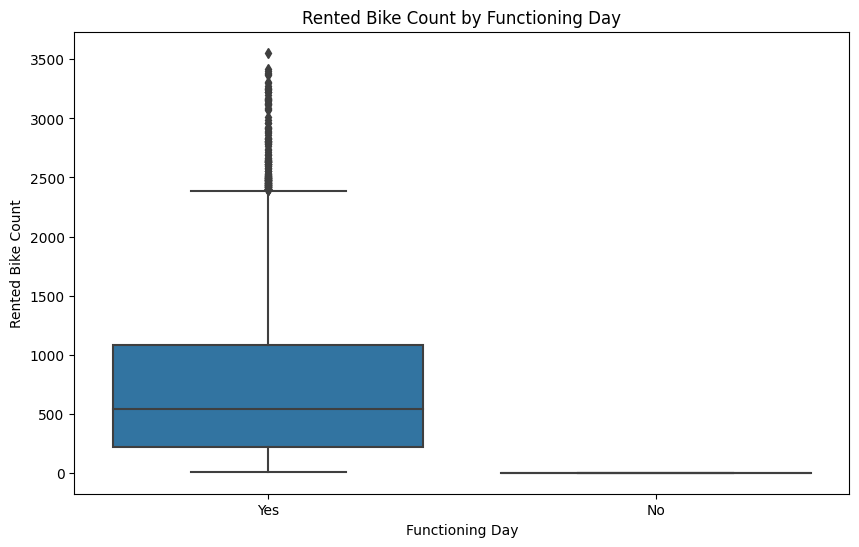

Mean Rented Bike Count by Functioning Day:
Functioning Day
No       0.000000
Yes    729.156999
Name: Rented Bike Count, dtype: float64




In [20]:
bivariate_analysis(df, 'Rented Bike Count')

# multivariate analysis

In [21]:

def multivariate_analysis(df, target_col):
    # Filter out non-numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Correlation Matrix
    plt.figure(figsize=(6, 4))
    corr_matrix = numeric_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()
    
    # Pairplot with numeric columns only
    if len(numeric_df.columns) > 1:
        sns.pairplot(df[numeric_df.columns], diag_kind='kde')
        plt.show()

    # Heatmap of correlations with the target variable
    plt.figure(figsize=(6, 4))
    corr_target = corr_matrix[[target_col]].sort_values(by=target_col, ascending=False)
    sns.heatmap(corr_target, annot=True, cmap='coolwarm', cbar=False)
    plt.title(f'Correlation of {target_col} with other features')
    plt.show()

    # Multivariate Regression Plot with two most correlated features with the target
    top_corr_features = corr_target.index[1:3]
    sns.pairplot(df, x_vars=top_corr_features, y_vars=target_col, kind='reg', height=5, aspect=1)
    plt.show()


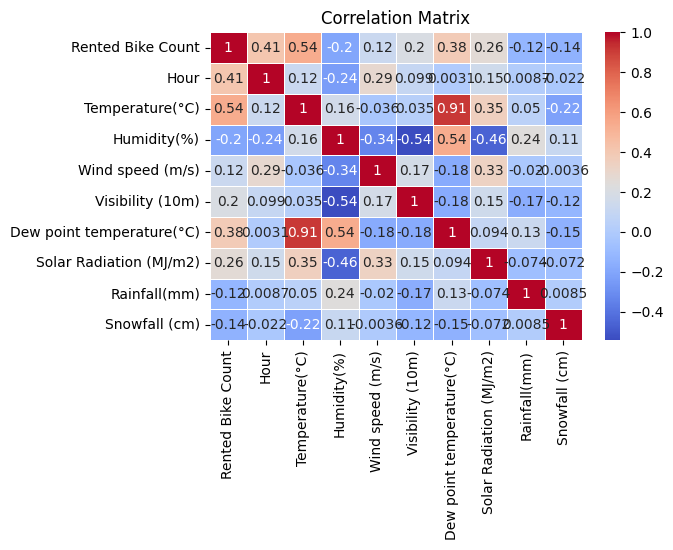

C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


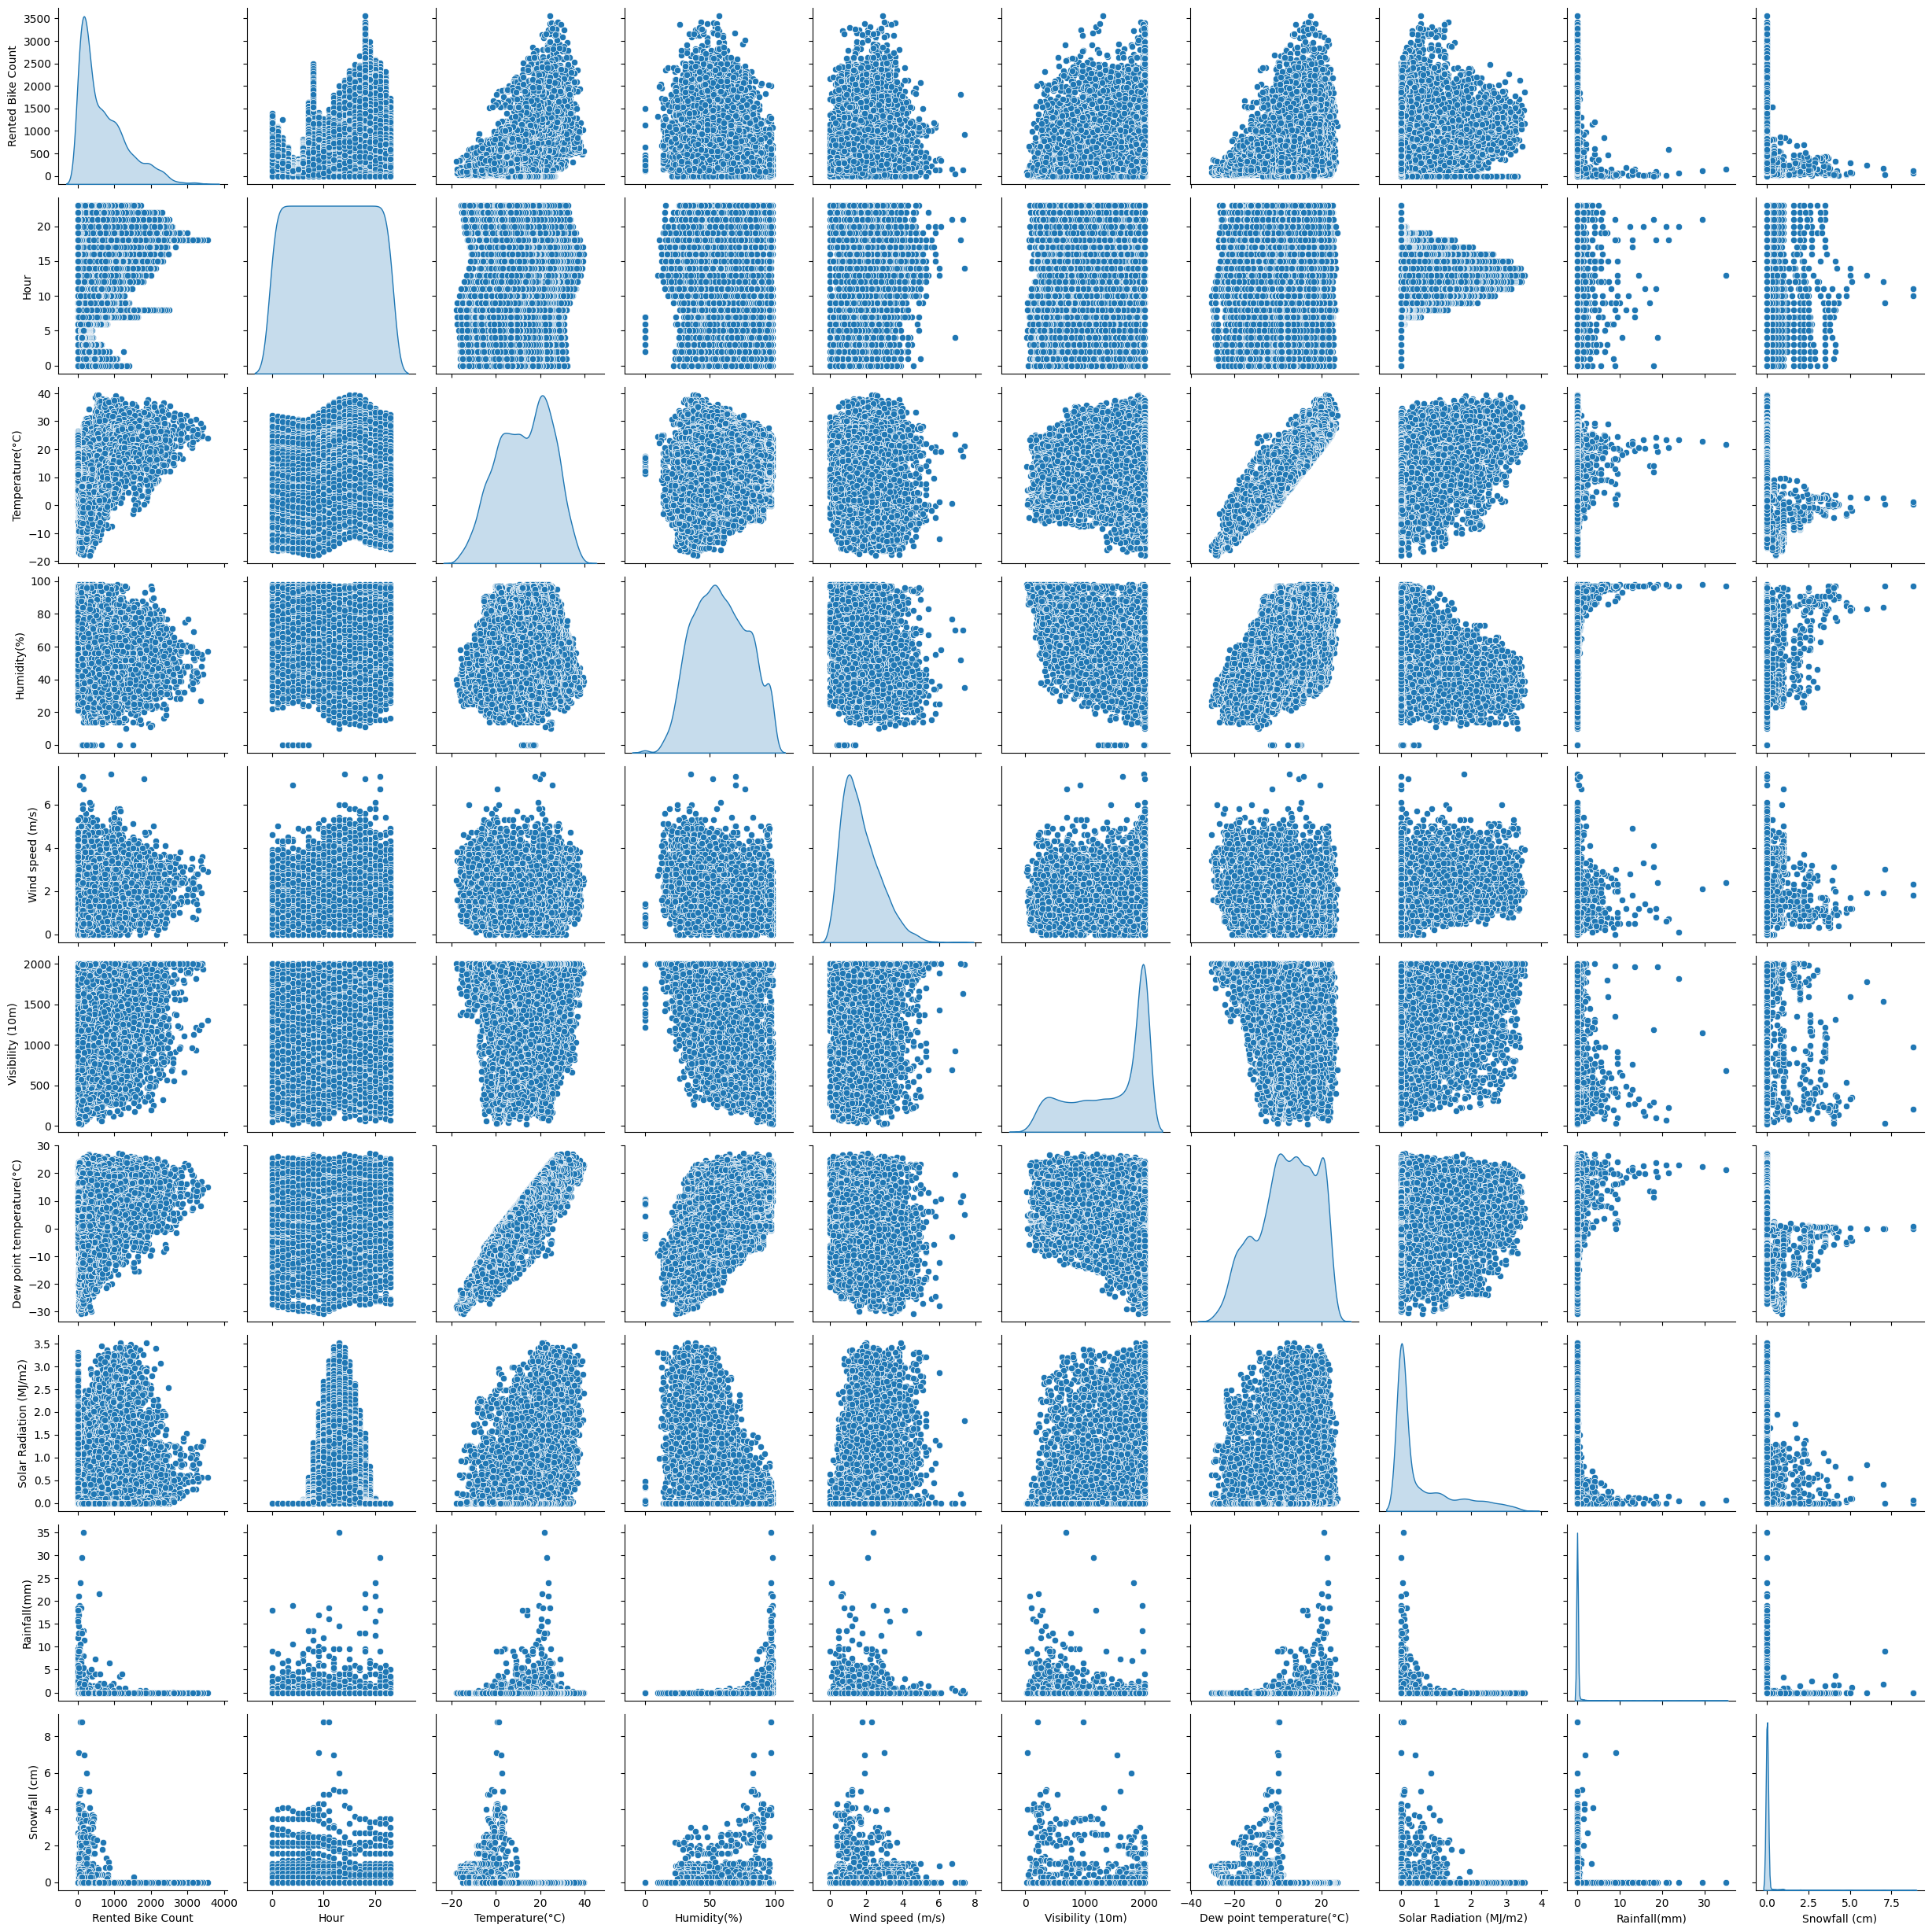

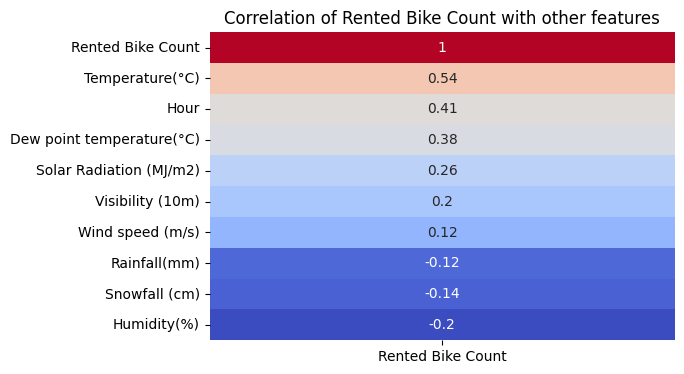

C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


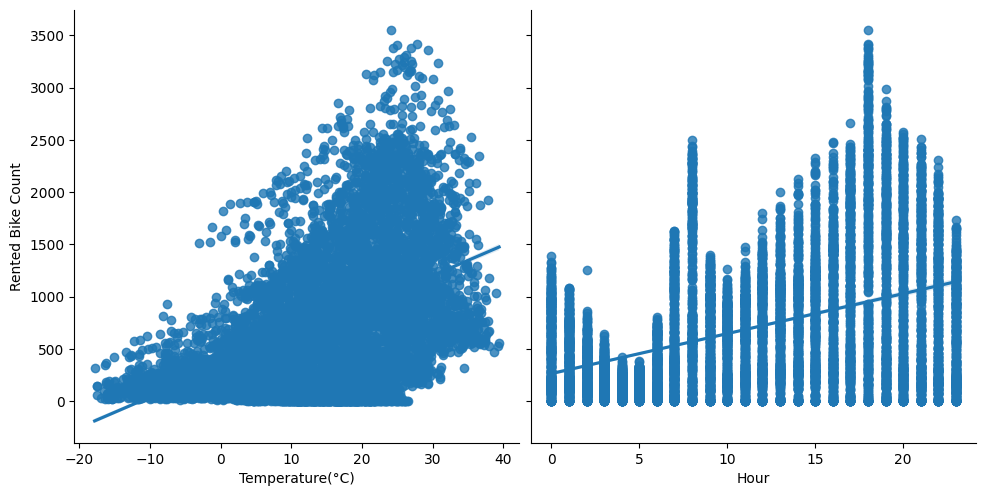

In [22]:
multivariate_analysis(df, 'Rented Bike Count')

1-corelation matrix
-Temperature (°C) has a positive correlation (0.54) with Rented Bike Count, meaning that as the temperature increases, bike rentals tend to increase.
-Hour has a negative correlation (-0.41) with Rented Bike Count. This suggests that certain hours of the day (likely night hours) are associated with fewer bike rentals.
-Dew Point Temperature (°C) has a negative correlation (-0.38) with Rented Bike Count, which could be related to how it affects human comfort and, therefore, outdoor activities.
-Humidity (%) shows a weak negative correlation (-0.20) with Rented Bike Count, indicating that higher humidity might slightly reduce bike rentals.
-Solar Radiation (MJ/m²) has a moderate positive correlation (0.26) with Rented Bike Count, indicating that higher solar radiation is associated with more bike rentals, likely due to more favorable weather conditions.
-Wind Speed (m/s), Visibility (10m), Rainfall (mm), and Snowfall (cm) show very weak correlations with Rented Bike Count, indicating that these factors have little impact on the number of bikes rented.

2- Pairplot matrix
-Temperature vs. Rented Bike Count: There is a clear upward trend, reinforcing the positive correlation. Warmer temperatures are associated with higher bike rentals.
-Hour vs. Rented Bike Count: The scatter plot suggests a time-dependent pattern in bike rentals, with certain hours showing higher or lower rental counts.
-Dew Point Temperature vs. Rented Bike Count: The scatter plot indicates a downward trend, consistent with the negative correlation observed. Higher dew point temperatures might be linked to lower bike rentals.
-Solar Radiation vs. Rented Bike Count: The scatter plot shows a positive trend, though it is less pronounced compared to temperature. Higher solar radiation generally correlates with increased bike rentals.
-Humidity vs. Rented Bike Count: There is a more dispersed pattern here, with no strong visible trend, consistent with the weaker correlation observed in the matrix.
-Wind Speed, Visibility, Rainfall, Snowfall: These scatter plots do not show strong trends, indicating that these factors do not significantly influence bike rentals.

Temperature vs. Rented Bike Count: There is a clear upward trend, reinforcing the positive correlation. Warmer temperatures are associated with higher bike rentals.

Hour vs. Rented Bike Count: The scatter plot suggests a time-dependent pattern in bike rentals, with certain hours showing higher or lower rental counts.

Dew Point Temperature vs. Rented Bike Count: The scatter plot indicates a downward trend, consistent with the negative correlation observed. Higher dew point temperatures might be linked to lower bike rentals.

Solar Radiation vs. Rented Bike Count: The scatter plot shows a positive trend, though it is less pronounced compared to temperature. Higher solar radiation generally correlates with increased bike rentals.

Humidity vs. Rented Bike Count: There is a more dispersed pattern here, with no strong visible trend, consistent with the weaker correlation observed in the matrix.

Wind Speed, Visibility, Rainfall, Snowfall: These scatter plots do not show strong trends, indicating that these factors do not significantly influence bike rentals.

In [23]:
df.drop(['Dew point temperature(°C)'],axis=1,inplace=True)

In [24]:
df.to_csv('bike_cleaned_data.csv',index=False)